<a href="https://colab.research.google.com/github/plaban1981/Agents/blob/main/Pydantic_AI_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PydanticAI


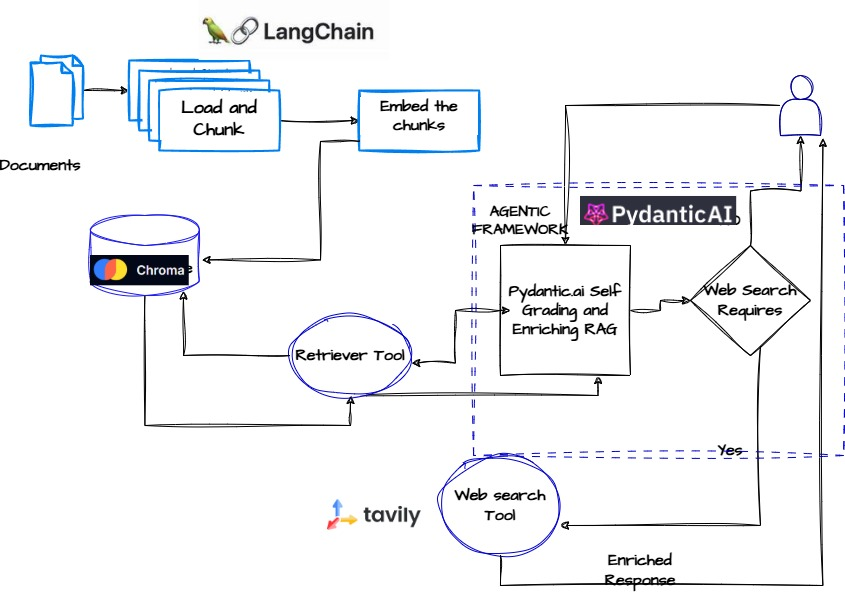

In [ ]:
!pip -q install pydantic-ai
!pip -q install nest_asyncio
!pip -q install devtools

### **Restart the notebook**

In [ ]:
import os
from google.colab import userdata
from IPython.display import display, Markdown

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')


In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
from pydantic_ai import Agent
from pydantic_ai.models.groq import GroqModel

groq_model = GroqModel('llama-3.1-70b-versatile')


In [ ]:
from pydantic_ai import Agent, ModelRetry

agent = Agent(
    'gemini-1.5-flash',
    system_prompt='Be very concise, reply with one sentence only.',
    retries=3
)

result = agent.run_sync('Where does "hello world" come from?')
print(result.data)

The phrase "Hello, world!" originates from Brian Kernighan's 1972 tutorial on the programming language B.



In [ ]:
agent.model = 'gemini-1.5-pro'

@agent.system_prompt
async def get_system_prompt(self) -> str:
    return "Give a long one paragraph answer and make it dense"

In [ ]:

result = agent.run_sync('Where does "hello world" come from?')
Markdown(result.data)

"Hello, World!" originated from a 1972 Bell Laboratories internal memorandum by Brian Kernighan, *A Tutorial Introduction to the Language B*,  where it was used to illustrate a simple program, and it gained widespread popularity through Kernighan and Ritchie's seminal 1978 book, *The C Programming Language*, becoming the canonical introductory program for countless novice programmers learning C and subsequently many other programming languages due to its simplicity, ease of understanding, and quick demonstration of basic input/output operations, cementing its status as a symbolic entry point into the world of computer programming.


## Basic structured output

In [ ]:
import os
from typing import cast

from pydantic import BaseModel

from pydantic_ai import Agent
from pydantic_ai.models import KnownModelName

class MyModel(BaseModel):
    city: str
    country: str
    reason: str
    famous_person_from_city: str


model = 'openai:gpt-4o'
print(f'Using model: {model}')

agent = Agent(model,
              result_type=MyModel,
              )


result = agent.run_sync('The windy city in the US of A.')
print(result.data)


Using model: openai:gpt-4o
city='Chicago' country='USA' reason="Chicago is commonly referred to as 'The Windy City', a nickname that originated in the late 19th century. Contrary to popular belief, it isn't necessarily because of the weather. The name came from Chicago's rivalries with Cincinnati and New York, with some asserting it refers to the city's politicians being 'full of hot air'." famous_person_from_city='Kanye West'


In [ ]:
print(result.cost())

Cost(request_tokens=86, response_tokens=114, total_tokens=200, details={'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0, 'cached_tokens': 0})


In [ ]:
result = agent.run_sync('The Merlion city.')
print(result.data)

city='Singapore' country='Singapore' reason="The Merlion is a well-known symbol of Singapore, often referred to as the Merlion City due to this iconic statue that has a lion's head and a fish's body, symbolizing Singapore's origin as a fishing village and its original name, Singapura, meaning 'Lion City.'" famous_person_from_city='Lee Kuan Yew'


In [ ]:
result = agent.run_sync('The cold city in the south')
print(result.data)

city='Ushuaia' country='Argentina' reason='It is known as the southernmost city in the world with a cold climate.' famous_person_from_city='Gustavo Melella'


In [ ]:
result.data.famous_person_from_city

'Gustavo Melella'

In [ ]:
agent

Agent(model=OpenAIModel(model_name='gpt-4o'), last_run_messages=[UserPrompt(content='The cold city in the south', timestamp=datetime.datetime(2024, 12, 4, 9, 46, 34, 832549, tzinfo=datetime.timezone.utc), role='user'), ModelStructuredResponse(calls=[ToolCall(tool_name='final_result', args=ArgsJson(args_json='{"city": "Ushuaia", "country": "Argentina", "reason": "It is known as the southernmost city in the world with a cold climate.", "famous_person_from_city": "Gustavo Melella"}'), tool_id='call_55thk60H2ap27ph8eaTNVUQy')], timestamp=datetime.datetime(2024, 12, 4, 9, 46, 35, tzinfo=datetime.timezone.utc), role='model-structured-response')])

## Chat APP

In [ ]:
from pydantic_ai import Agent
from pprint import pprint

In [ ]:
agent = Agent('openai:gpt-4o-mini', system_prompt='Be a helpful assistant.')

In [ ]:
result = agent.run_sync('Tell me a joke.')
print(result.data)

Why did the scarecrow win an award?

Because he was outstanding in his field!


In [ ]:
# all messages from the run
pprint(result.all_messages())

[SystemPrompt(content='Be a helpful assistant.', role='system'),
 UserPrompt(content='Tell me a joke.',
            timestamp=datetime.datetime(2024, 12, 4, 9, 48, 56, 339698, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content='Why did the scarecrow win an award?\n'
                           '\n'
                           'Because he was outstanding in his field!',
                   timestamp=datetime.datetime(2024, 12, 4, 9, 48, 56, tzinfo=datetime.timezone.utc),
                   role='model-text-response')]


In [ ]:
type(result.all_messages())

list

In [ ]:
pprint(result.new_messages())

[UserPrompt(content='Tell me a joke.',
            timestamp=datetime.datetime(2024, 12, 4, 9, 48, 56, 339698, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content='Why did the scarecrow win an award?\n'
                           '\n'
                           'Because he was outstanding in his field!',
                   timestamp=datetime.datetime(2024, 12, 4, 9, 48, 56, tzinfo=datetime.timezone.utc),
                   role='model-text-response')]


In [ ]:
result2 = agent.run_sync('Explain it please?', message_history=result.new_messages())
print(result2.data)

Sure! The joke plays on the double meaning of the phrase "outstanding in his field." 

1. **Literal Meaning**: A scarecrow is literally placed in a field to scare away birds and protect crops, so it is "out standing" in the field. 

2. **Figurative Meaning**: The phrase "outstanding in his field" is commonly used to refer to someone who is exceptional or excels in their area of expertise or profession. 

The humor comes from the pun where the literal situation of a scarecrow being in a field is combined with the idiomatic expression about excellence. So, the scarecrow is both literally improving the field and humorously implied to be excellent at his "job."


In [ ]:
pprint(result2.all_messages())

[SystemPrompt(content='Be a helpful assistant.', role='system'),
 UserPrompt(content='Tell me a joke.',
            timestamp=datetime.datetime(2024, 12, 4, 9, 48, 56, 339698, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content='Why did the scarecrow win an award?\n'
                           '\n'
                           'Because he was outstanding in his field!',
                   timestamp=datetime.datetime(2024, 12, 4, 9, 48, 56, tzinfo=datetime.timezone.utc),
                   role='model-text-response'),
 UserPrompt(content='Explain it please?',
            timestamp=datetime.datetime(2024, 12, 4, 9, 50, 3, 392053, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content='Sure! The joke plays on the double meaning of the '
                           'phrase "outstanding in his field." \n'
                           '\n'
                           '1. **Literal Meaning**: A scarecrow is literally '
                   

In [ ]:
pprint(result2.new_messages())

[UserPrompt(content='Explain it please?',
            timestamp=datetime.datetime(2024, 12, 4, 9, 50, 3, 392053, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content='Sure! The joke plays on the double meaning of the '
                           'phrase "outstanding in his field." \n'
                           '\n'
                           '1. **Literal Meaning**: A scarecrow is literally '
                           'placed in a field to scare away birds and protect '
                           'crops, so it is "out standing" in the field. \n'
                           '\n'
                           '2. **Figurative Meaning**: The phrase "outstanding '
                           'in his field" is commonly used to refer to someone '
                           'who is exceptional or excels in their area of '
                           'expertise or profession. \n'
                           '\n'
                           'The humor comes from the pun

In [ ]:
result3 = agent.run_sync('Where does the joke come from?', message_history=result2.all_messages())
print(result3.data)

The joke is a classic example of a pun, which is a form of wordplay that exploits multiple meanings of a term or similar-sounding words for humorous effect. It doesn't have a specific origin or source but has been circulated widely in various forms of humor, including stand-up comedy, children's jokes, and light-hearted writings. Puns have been a part of humor for centuries, and similar structures have appeared in literature and folklore.

Jokes like these often appear in joke books, online humor websites, or social media, where simple wordplay is appreciated for its lightheartedness. The scarecrow joke is particularly popular because it's simple, relatable, and suitable for all ages. Its charm lies in its cleverness and the visual imagery it evokes.


In [ ]:
pprint(result3.all_messages())

[SystemPrompt(content='Be a helpful assistant.', role='system'),
 UserPrompt(content='Tell me a joke.',
            timestamp=datetime.datetime(2024, 12, 4, 9, 48, 56, 339698, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content='Why did the scarecrow win an award?\n'
                           '\n'
                           'Because he was outstanding in his field!',
                   timestamp=datetime.datetime(2024, 12, 4, 9, 48, 56, tzinfo=datetime.timezone.utc),
                   role='model-text-response'),
 UserPrompt(content='Explain it please?',
            timestamp=datetime.datetime(2024, 12, 4, 9, 50, 3, 392053, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content='Sure! The joke plays on the double meaning of the '
                           'phrase "outstanding in his field." \n'
                           '\n'
                           '1. **Literal Meaning**: A scarecrow is literally '
                   

In [ ]:
print(result3.all_messages_json())

b'[{"content":"Be a helpful assistant.","role":"system"},{"content":"Tell me a joke.","timestamp":"2024-12-04T09:48:56.339698Z","role":"user"},{"content":"Why did the scarecrow win an award?\\n\\nBecause he was outstanding in his field!","timestamp":"2024-12-04T09:48:56Z","role":"model-text-response"},{"content":"Explain it please?","timestamp":"2024-12-04T09:50:03.392053Z","role":"user"},{"content":"Sure! The joke plays on the double meaning of the phrase \\"outstanding in his field.\\" \\n\\n1. **Literal Meaning**: A scarecrow is literally placed in a field to scare away birds and protect crops, so it is \\"out standing\\" in the field. \\n\\n2. **Figurative Meaning**: The phrase \\"outstanding in his field\\" is commonly used to refer to someone who is exceptional or excels in their area of expertise or profession. \\n\\nThe humor comes from the pun where the literal situation of a scarecrow being in a field is combined with the idiomatic expression about excellence. So, the scarecr

## Chatting LLMs

In [ ]:
from pydantic_ai import Agent

agent = Agent('openai:gpt-4o-mini', system_prompt='Be a helpful assistant.')

result1 = agent.run_sync('Tell me a joke.')
print(result1.data)

result2 = agent.run_sync(
    'Explain?', model='gemini-1.5-pro', message_history=result1.new_messages()
)
print(result2.data)




Why don't skeletons fight each other? 

They don't have the guts!
The joke plays on the double meaning of "guts."  It refers to both intestines (which skeletons lack) and courage or bravery.  So, skeletons don't fight because they don't have the physical organs, but the joke implies they also lack the courage.



In [ ]:
pprint(result2.all_messages())

[SystemPrompt(content='Be a helpful assistant.', role='system'),
 UserPrompt(content='Tell me a joke.',
            timestamp=datetime.datetime(2024, 12, 4, 9, 52, 5, 563936, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content="Why don't skeletons fight each other? \n"
                           '\n'
                           "They don't have the guts!",
                   timestamp=datetime.datetime(2024, 12, 4, 9, 52, 5, tzinfo=datetime.timezone.utc),
                   role='model-text-response'),
 UserPrompt(content='Explain?',
            timestamp=datetime.datetime(2024, 12, 4, 9, 52, 6, 47446, tzinfo=datetime.timezone.utc),
            role='user'),
 ModelTextResponse(content='The joke plays on the double meaning of "guts."  '
                           'It refers to both intestines (which skeletons '
                           "lack) and courage or bravery.  So, skeletons don't "
                           "fight because they don't have the phys

## Weather

In [ ]:
from __future__ import annotations as _annotations

import asyncio
import os
from dataclasses import dataclass
from typing import Any

from devtools import debug
from httpx import AsyncClient

from pydantic_ai import Agent, ModelRetry, RunContext

In [ ]:
@dataclass
class Deps:
    client: AsyncClient
    weather_api_key: str | None
    geo_api_key: str | None


In [ ]:

weather_agent = Agent(
    'openai:gpt-4o',
    system_prompt='Be concise, reply with one sentence.',
    deps_type=Deps,
    retries=2,
)

@weather_agent.tool
async def get_lat_lng(
    ctx: RunContext[Deps], location_description: str
) -> dict[str, float]:
    """Get the latitude and longitude of a location.

    Args:
        ctx: The context.
        location_description: A description of a location.
    """
    if ctx.deps.geo_api_key is None:
        # if no API key is provided, return a dummy response (London)
        return {'lat': 51.1, 'lng': -0.1}

    params = {
        'q': location_description,
        'api_key': ctx.deps.geo_api_key,
    }
    with logfire.span('calling geocode API', params=params) as span:
        r = await ctx.deps.client.get('https://geocode.maps.co/search', params=params)
        r.raise_for_status()
        data = r.json()
        span.set_attribute('response', data)

    if data:
        return {'lat': data[0]['lat'], 'lng': data[0]['lon']}
    else:
        raise ModelRetry('Could not find the location')


@weather_agent.tool
async def get_weather(ctx: RunContext[Deps], lat: float, lng: float) -> dict[str, Any]:
    """Get the weather at a location.

    Args:
        ctx: The context.
        lat: Latitude of the location.
        lng: Longitude of the location.
    """
    if ctx.deps.weather_api_key is None:
        # if no API key is provided, return a dummy response
        return {'temperature': '21 °C', 'description': 'Sunny'}

    params = {
        'apikey': ctx.deps.weather_api_key,
        'location': f'{lat},{lng}',
        'units': 'metric',
    }
    with logfire.span('calling weather API', params=params) as span:
        r = await ctx.deps.client.get(
            'https://api.tomorrow.io/v4/weather/realtime', params=params
        )
        r.raise_for_status()
        data = r.json()
        span.set_attribute('response', data)

    values = data['data']['values']
    # https://docs.tomorrow.io/reference/data-layers-weather-codes
    code_lookup = {
        1000: 'Clear, Sunny',
        1100: 'Mostly Clear',
        1101: 'Partly Cloudy',
        1102: 'Mostly Cloudy',
        1001: 'Cloudy',
        2000: 'Fog',
        2100: 'Light Fog',
        4000: 'Drizzle',
        4001: 'Rain',
        4200: 'Light Rain',
        4201: 'Heavy Rain',
        5000: 'Snow',
        5001: 'Flurries',
        5100: 'Light Snow',
        5101: 'Heavy Snow',
        6000: 'Freezing Drizzle',
        6001: 'Freezing Rain',
        6200: 'Light Freezing Rain',
        6201: 'Heavy Freezing Rain',
        7000: 'Ice Pellets',
        7101: 'Heavy Ice Pellets',
        7102: 'Light Ice Pellets',
        8000: 'Thunderstorm',
    }
    return {
        'temperature': f'{values["temperatureApparent"]:0.0f}°C',
        'description': code_lookup.get(values['weatherCode'], 'Unknown'),
    }





In [ ]:
async def main():
    async with AsyncClient() as client:
        # create a free API key at https://www.tomorrow.io/weather-api/
        weather_api_key = os.getenv('WEATHER_API_KEY')
        # create a free API key at https://geocode.maps.co/
        geo_api_key = os.getenv('GEO_API_KEY')
        deps = Deps(
            client=client, weather_api_key=weather_api_key, geo_api_key=geo_api_key
        )
        result = await weather_agent.run(
            'What is the weather like in London and in Singapore?', deps=deps
        )
        debug(result)
        print('Response:', result.data)

In [ ]:
asyncio.run(main())

<ipython-input-66-a2f9f6cbe960>:13 main
    result: RunResult(
        _all_messages=[
            SystemPrompt(
                content='Be concise, reply with one sentence.',
                role='system',
            ),
            UserPrompt(
                content='What is the weather like in London and in Singapore?',
                timestamp=datetime.datetime(2024, 12, 4, 9, 56, 16, 119801, tzinfo=datetime.timezone.utc),
                role='user',
            ),
            ModelStructuredResponse(
                calls=[
                    ToolCall(
                        tool_name='get_lat_lng',
                        args=ArgsJson(
                            args_json='{"location_description": "London"}',
                        ),
                        tool_id='call_eUhSdrJJpsLdmVBBarXAY2aE',
                    ),
                    ToolCall(
                        tool_name='get_lat_lng',
                        args=ArgsJson(
                            args_j

## Streaming MarkDown

In [ ]:
import asyncio
import os

from rich.console import Console, ConsoleOptions, RenderResult
from rich.live import Live
from rich.markdown import CodeBlock, Markdown
from rich.syntax import Syntax
from rich.text import Text

from pydantic_ai import Agent
from pydantic_ai.models import KnownModelName


agent = Agent()

# models to try, and the appropriate env var
models: list[tuple[KnownModelName, str]] = [
    ('gemini-1.5-flash', 'GEMINI_API_KEY'),
    ('openai:gpt-4o-mini', 'OPENAI_API_KEY'),
    ('groq:llama-3.1-70b-versatile', 'GROQ_API_KEY'),
]


async def main():
    prettier_code_blocks()
    console = Console()
    prompt = 'Show me a short example of using Pydantic.'
    console.log(f'Asking: {prompt}...', style='cyan')
    for model, env_var in models:
        if env_var in os.environ:
            console.log(f'Using model: {model}')
            with Live('', console=console, vertical_overflow='visible') as live:
                async with agent.run_stream(prompt, model=model) as result:
                    async for message in result.stream():
                        live.update(Markdown(message))
            console.log(result.cost())
        else:
            console.log(f'{model} requires {env_var} to be set.')


def prettier_code_blocks():
    """Make rich code blocks prettier and easier to copy.

    From https://github.com/samuelcolvin/aicli/blob/v0.8.0/samuelcolvin_aicli.py#L22
    """

    class SimpleCodeBlock(CodeBlock):
        def __rich_console__(
            self, console: Console, options: ConsoleOptions
        ) -> RenderResult:
            code = str(self.text).rstrip()
            yield Text(self.lexer_name, style='dim')
            yield Syntax(
                code,
                self.lexer_name,
                theme=self.theme,
                background_color='black',
                word_wrap=True,
            )
            yield Text(f'/{self.lexer_name}', style='dim')

    Markdown.elements['fence'] = SimpleCodeBlock


if __name__ == '__main__':
    asyncio.run(main())

[10:00:18] Asking: Show me a short example of using Pydantic....                 <ipython-input-69-fb37c035d7d1>:28

           Using model: gemini-1.5-flash                                         <ipython-input-69-fb37c035d7d1>:31

Output()

[10:00:21] Cost(                                                                 <ipython-input-69-fb37c035d7d1>:36
               request_tokens=132,                                                                                 
               response_tokens=390,                                                                                
               total_tokens=522,                                                                                   
               details=None                                                                                        
           )                                                                                                       

           Using model: openai:gpt-4o-mini                                       <ipython-input-69-fb37c035d7d1>:31

Output()

[10:00:26] Cost(                                                                 <ipython-input-69-fb37c035d7d1>:36
               request_tokens=18,                                                                                  
               response_tokens=366,                                                                                
               total_tokens=384,                                                                                   
               details={                                                                                           
                   'accepted_prediction_tokens': 0,                                                                
                   'audio_tokens': 0,                                                                              
                   'reasoning_tokens': 0,                                                                          
                   'rejected_prediction_tokens': 0,                                                                
                   'cached_tokens': 0                                                                              
               }                                                                                                   
           )                                                                                                       

           Using model: groq:llama-3.1-70b-versatile                             <ipython-input-69-fb37c035d7d1>:31

Output()

[10:00:28] Cost(                                                                 <ipython-input-69-fb37c035d7d1>:36
               request_tokens=46,                                                                                  
               response_tokens=465,                                                                                
               total_tokens=511,                                                                                   
               details=None                                                                                        
           )                                                                                                       